In [237]:
#data frame 
import numpy as np
import pandas as pd 

#data 
import seaborn as sns 

#data split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import robust_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

#model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#visualization 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#encorsing 
from sklearn.compose import ColumnTransformer
import category_encoders as ce
#mse
from sklearn.metrics import mean_squared_error


In [189]:
df=sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [190]:

onehot_var = ['sex','smoke','time']
onehot = OneHotEncoder()


In [191]:
ordinal_var = ['day']
ordinal_mapping =[
    {'col':'day',
    'mapping' : {None:0,'Thur':1,'Fri':2,'Sat':3,'Sun':4}}
]
ordinal_encoder=ce.OrdinalEncoder(cols = ordinal_var,mapping = ordinal_mapping )

In [192]:


transformer = ColumnTransformer([('one hot',onehot,['sex','smoker','time'])]

)

In [193]:
tips_encoded=pd.DataFrame(transformer.fit_transform(df))
tips_encoded.columns= transformer.get_feature_names()
tips_encoded

c:\Users\margaritha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,one hot__x0_Female,one hot__x0_Male,one hot__x1_No,one hot__x1_Yes,one hot__x2_Dinner,one hot__x2_Lunch
0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,1.0,0.0
241,0.0,1.0,0.0,1.0,1.0,0.0
242,0.0,1.0,1.0,0.0,1.0,0.0


In [194]:
transformer_ordinal =ColumnTransformer ([
                        ('ordinal encoder',ordinal_encoder ,['day'])])

In [195]:
transformer_ordinal

ColumnTransformer(transformers=[('ordinal encoder',
                                 OrdinalEncoder(cols=['day'],
                                                mapping=[{'col': 'day',
                                                          'mapping': {None: 0,
                                                                      'Fri': 2,
                                                                      'Sat': 3,
                                                                      'Sun': 4,
                                                                      'Thur': 1}}]),
                                 ['day'])])

In [196]:
tips_ordinal=pd.DataFrame(transformer_ordinal.fit_transform(df))
tips_ordinal.columns= transformer_ordinal.get_feature_names()
tips_ordinal

c:\Users\margaritha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ordinal encoder__day
0,4
1,4
2,4
3,4
4,4
...,...
239,3
240,3
241,3
242,3


In [197]:
onehot=OneHotEncoder()

In [198]:
transformer = ColumnTransformer([ 
                                ('onehot',onehot ,['sex','smoker','time']),
                                ('ordinal encoder',ordinal_encoder ,['day'])],
                                remainder='passthrough'
                                
                               
)

In [199]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(),
                                 ['sex', 'smoker', 'time']),
                                ('ordinal encoder',
                                 OrdinalEncoder(cols=['day'],
                                                mapping=[{'col': 'day',
                                                          'mapping': {None: 0,
                                                                      'Fri': 2,
                                                                      'Sat': 3,
                                                                      'Sun': 4,
                                                                      'Thur': 1}}]),
                                 ['day'])])

In [200]:
transformer.get_feature_names()

c:\Users\margaritha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [201]:
check = transformer.fit_transform(df)
check = pd.DataFrame(check)
check.columns=transformer.get_feature_names()
check

c:\Users\margaritha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,onehot__x0_Female,onehot__x0_Male,onehot__x1_No,onehot__x1_Yes,onehot__x2_Dinner,onehot__x2_Lunch,ordinal encoder__day,total_bill,tip,size
0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,16.99,1.01,2.0
1,0.0,1.0,1.0,0.0,1.0,0.0,4.0,10.34,1.66,3.0
2,0.0,1.0,1.0,0.0,1.0,0.0,4.0,21.01,3.50,3.0
3,0.0,1.0,1.0,0.0,1.0,0.0,4.0,23.68,3.31,2.0
4,1.0,0.0,1.0,0.0,1.0,0.0,4.0,24.59,3.61,4.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,1.0,0.0,3.0,29.03,5.92,3.0
240,1.0,0.0,0.0,1.0,1.0,0.0,3.0,27.18,2.00,2.0
241,0.0,1.0,0.0,1.0,1.0,0.0,3.0,22.67,2.00,2.0
242,0.0,1.0,1.0,0.0,1.0,0.0,3.0,17.82,1.75,2.0


In [202]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [203]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [204]:
onehot_var2 = ['sex','smoker']
ordinal_var2 = ['day','time']
ordinal_mapping2 =[
    {'col':'day',
    'mapping' : {None:0,'Thur':1,'Fri':2,'Sat':3,'Sun':4}},
    {'col':'time',
    'mapping': {None:0,'Lunch':1, 'Dinner':2}}
]
ordinal_encoder2 =ce.OrdinalEncoder(cols = ordinal_var2,mapping = ordinal_mapping2 )

In [205]:
transformer2 = ColumnTransformer([ 
                                ('onehot',onehot ,onehot_var2),
                                ('ordinal encoder',ordinal_encoder2 ,ordinal_var2)],
                                remainder= 'passthrough'
                               
)

In [206]:
transformer2

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(), ['sex', 'smoker']),
                                ('ordinal encoder',
                                 OrdinalEncoder(cols=['day', 'time'],
                                                mapping=[{'col': 'day',
                                                          'mapping': {None: 0,
                                                                      'Fri': 2,
                                                                      'Sat': 3,
                                                                      'Sun': 4,
                                                                      'Thur': 1}},
                                                         {'col': 'time',
                                                          'mapping': {None: 0,
                                                                      'Dinner': 2,
                                                                      'Lunch': 1}}]),
                                 ['day', 'time'])])

In [207]:
check2 = transformer2.fit_transform(df)
check2 = pd.DataFrame(check2)
check2.columns= transformer2.get_feature_names()

c:\Users\margaritha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [208]:
check

,onehot__x0_Female,onehot__x0_Male,onehot__x1_No,onehot__x1_Yes,onehot__x2_Dinner,onehot__x2_Lunch,ordinal encoder__day,total_bill,tip,size
0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,16.99,1.01,2.0
1,0.0,1.0,1.0,0.0,1.0,0.0,4.0,10.34,1.66,3.0
2,0.0,1.0,1.0,0.0,1.0,0.0,4.0,21.01,3.50,3.0
3,0.0,1.0,1.0,0.0,1.0,0.0,4.0,23.68,3.31,2.0
4,1.0,0.0,1.0,0.0,1.0,0.0,4.0,24.59,3.61,4.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,1.0,0.0,3.0,29.03,5.92,3.0
240,1.0,0.0,0.0,1.0,1.0,0.0,3.0,27.18,2.00,2.0
241,0.0,1.0,0.0,1.0,1.0,0.0,3.0,22.67,2.00,2.0
242,0.0,1.0,1.0,0.0,1.0,0.0,3.0,17.82,1.75,2.0


In [209]:
check2 

,onehot__x0_Female,onehot__x0_Male,onehot__x1_No,onehot__x1_Yes,ordinal encoder__day,ordinal encoder__time,total_bill,tip,size
0,1.0,0.0,1.0,0.0,4.0,2.0,16.99,1.01,2.0
1,0.0,1.0,1.0,0.0,4.0,2.0,10.34,1.66,3.0
2,0.0,1.0,1.0,0.0,4.0,2.0,21.01,3.50,3.0
3,0.0,1.0,1.0,0.0,4.0,2.0,23.68,3.31,2.0
4,1.0,0.0,1.0,0.0,4.0,2.0,24.59,3.61,4.0
...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,3.0,2.0,29.03,5.92,3.0
240,1.0,0.0,0.0,1.0,3.0,2.0,27.18,2.00,2.0
241,0.0,1.0,0.0,1.0,3.0,2.0,22.67,2.00,2.0
242,0.0,1.0,1.0,0.0,3.0,2.0,17.82,1.75,2.0


DATA SPLITTING 

In [210]:
X= df[['sex','smoker','time','day','total_bill','size']]#depeendent (feature)
y=df['tip'] # target 

In [211]:
X_Train,X_test,y_train,y_test = train_test_split(X,
y,
random_state=10)

In [212]:
X_Train

,sex,smoker,time,day,total_bill,size
58,Male,Yes,Dinner,Sat,11.24,2
1,Male,No,Dinner,Sun,10.34,3
2,Male,No,Dinner,Sun,21.01,3
68,Male,No,Dinner,Sat,20.23,2
184,Male,Yes,Dinner,Sun,40.55,2
...,...,...,...,...,...,...
64,Male,No,Dinner,Sat,17.59,3
15,Male,No,Dinner,Sun,21.58,2
228,Male,No,Dinner,Sat,13.28,2
125,Female,No,Lunch,Thur,29.80,6


Modeling Preprocessing 1 

In [213]:
X_train_preprocessing = transformer.fit_transform(X_Train) # preprocess V1 fit with X_train
X_test_preprocessing = transformer.fit_transform(X_test) #preprocess V1 fit with X_test


In [214]:
model = DecisionTreeRegressor(max_depth = 3)

In [215]:
model.fit(X_train_preprocessing,y_train)

DecisionTreeRegressor(max_depth=3)

In [216]:
y_predict1 = model.predict(X_test_preprocessing)
mean_squared_error(y_test,y_predict1)

0.8414314225960589

#modeling preprosessing 2 

In [217]:
X_train_preprocessing2 = transformer2.fit_transform(X_Train)
X_test_preprocessing2 = transformer2.fit_transform(X_test)

In [219]:
model.fit(X_train_preprocessing2,y_train)

DecisionTreeRegressor(max_depth=3)

In [220]:
y_predict2 = model.predict(X_test_preprocessing2)

In [221]:
mean_squared_error(y_test,y_predict2)

0.8414314225960589

In [223]:
model.feature_importances_

array([0.        , 0.        , 0.01921652, 0.09209129, 0.        ,
       0.        , 0.8886922 , 0.        ])

In [226]:
transformer.transformers_

[('onehot', OneHotEncoder(), ['sex', 'smoker', 'time']),
 ('ordinal encoder',
  OrdinalEncoder(cols=['day'],
                 mapping=[{'col': 'day',
                           'mapping': {None: 0, 'Fri': 2, 'Sat': 3, 'Sun': 4,
                                       'Thur': 1}}]),
  ['day']),
 ('remainder', 'passthrough', [4, 5])]

In [227]:
transformer.transformers_[0][1].get_feature_names()

c:\Users\margaritha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_Dinner', 'x2_Lunch'],
      dtype=object)

In [228]:
transformer.transformers_[1][1].get_feature_names()

['day']

In [231]:
feature_name = list(transformer.transformers_[0][1].get_feature_names()+transformer.transformers_[1][1].get_feature_names())+['total_bill','size']

In [233]:
importance_table=pd.DataFrame({
    'imp' : model.feature_importances_
    }, index =  feature_name)

In [234]:
importance_table

,imp
x0_Femaleday,0.000000
x0_Maleday,0.000000
x1_Noday,0.019217
x1_Yesday,0.092091
x2_Dinnerday,0.000000
x2_Lunchday,0.000000
total_bill,0.888692
size,0.000000


<AxesSubplot: >

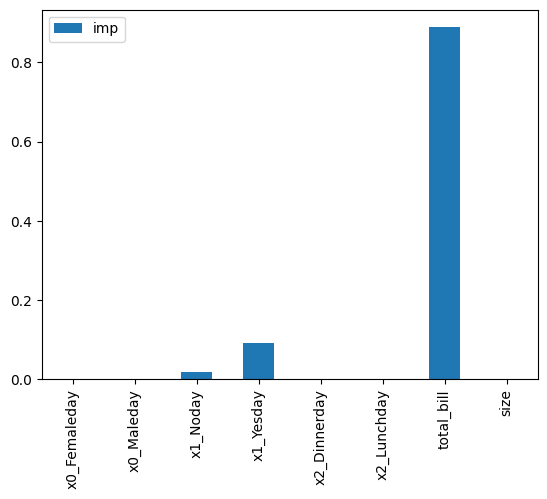

In [235]:
importance_table.plot(kind= 'bar')

<function matplotlib.pyplot.show(close=None, block=None)>

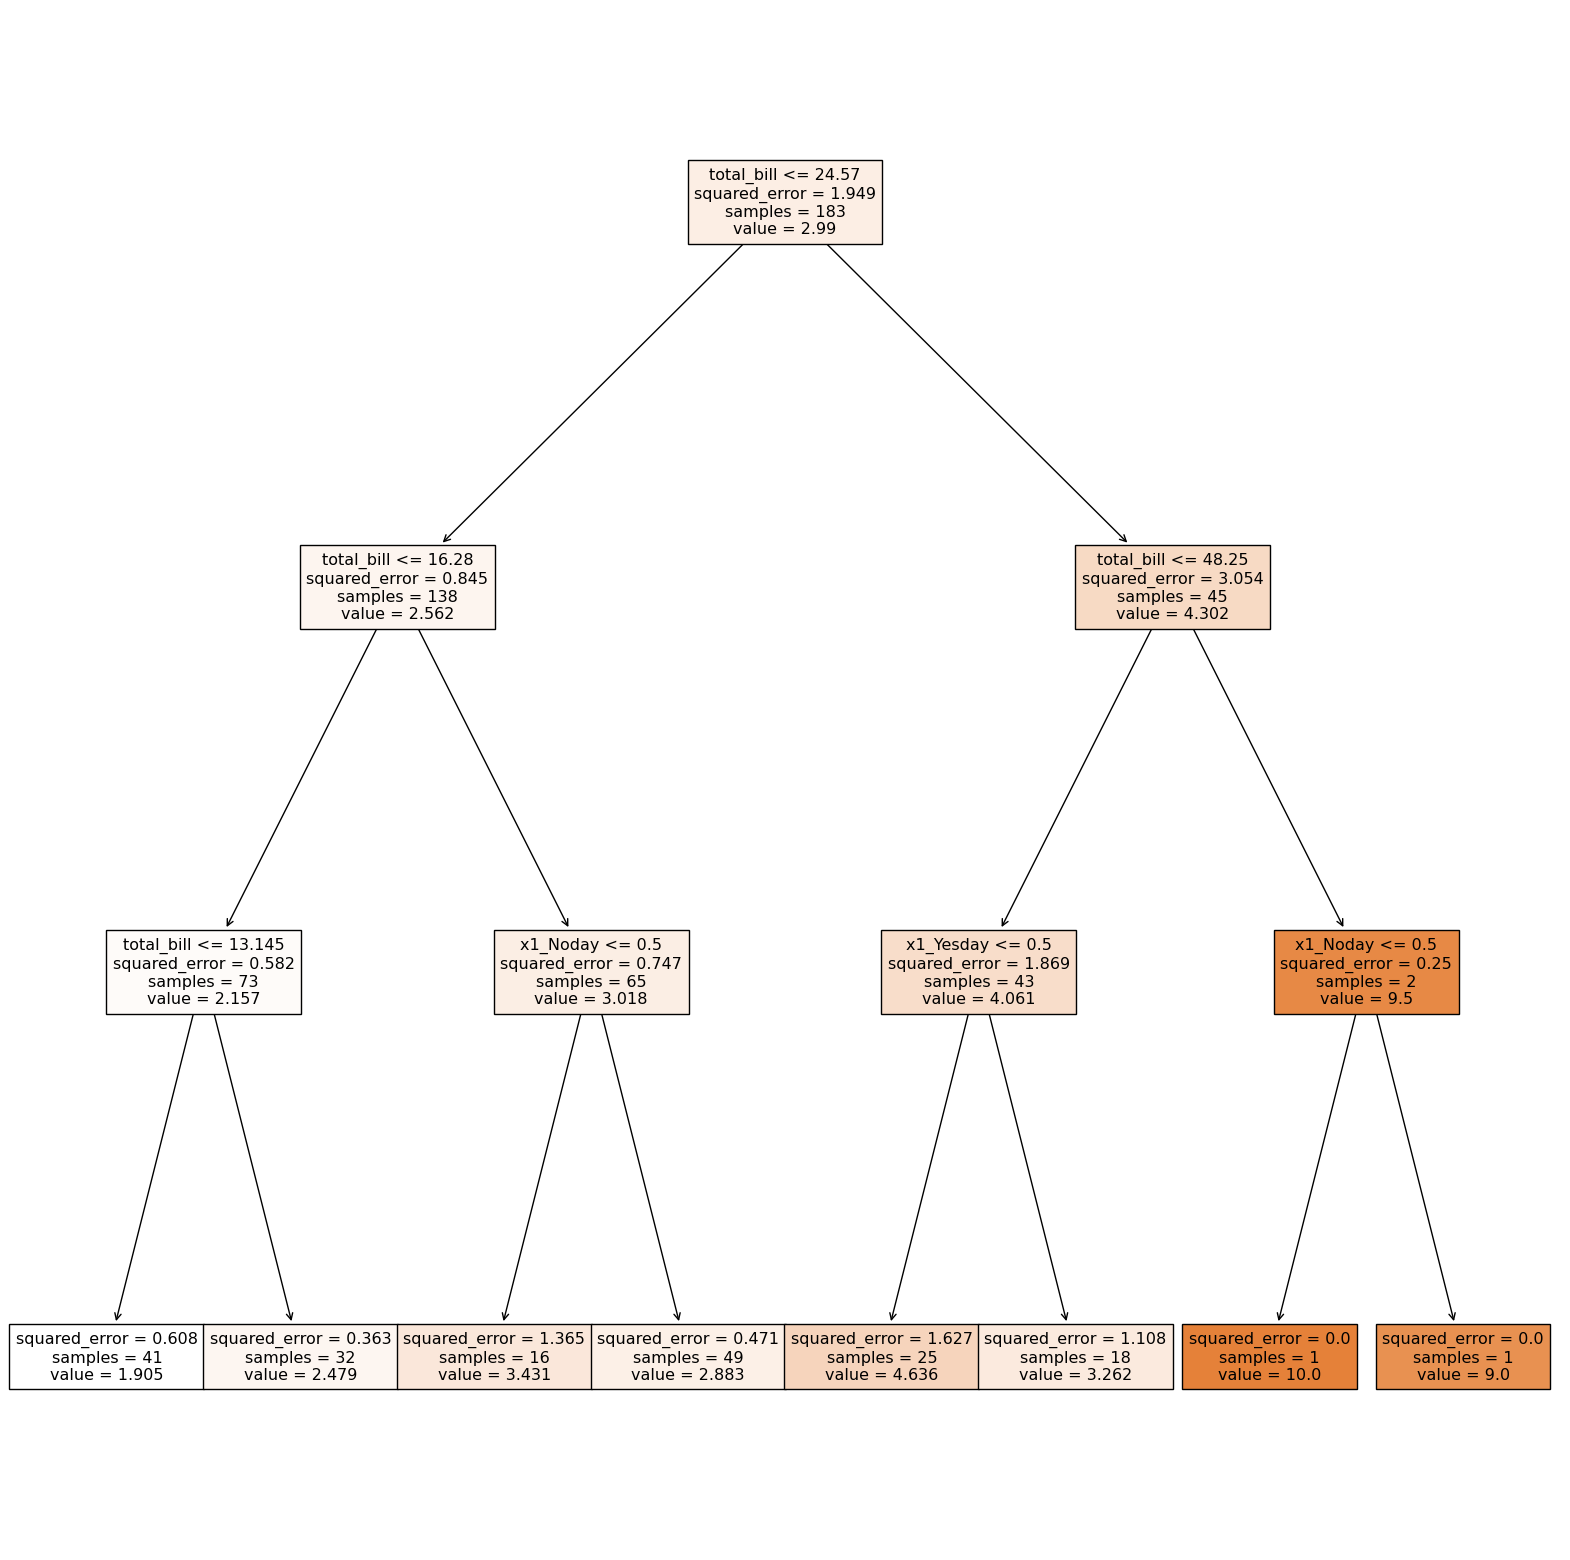

In [241]:
plt.figure (figsize=(20,20))

plot_tree(model,feature_names=feature_name,filled=True )

plt.show